# Random Projections


![](../../../../Documents/Screenshots/screenshot.274.jpg)

If you have a dataset that contains **rows = 5_000** and **features = 20_000**, and you don't want that the distance
between any two distances to change more than **tolerance = 10%**, so the formula based on **rows** and **tolerance** reduced dimensions to **7300**,
**The difference to PCA is that this algorithm doesn't care about the number of features**

In [38]:
import numpy as np
from sklearn.random_projection import johnson_lindenstrauss_min_dim
rows, tolerance = 5000, 0.1
dimensions = johnson_lindenstrauss_min_dim(rows, eps=tolerance)

#johnson_lindenstrauss_min_dim equation without scikit
dimensions_without_scikit = int(4 * np.log(rows) / (tolerance ** 2 / 2 - tolerance ** 3 / 3))

print('Number of dimensions: ',dimensions, dimensions_without_scikit)

Number of dimensions:  7300 7300


Now we can generate random matrix with 20_000 features, and 7300 rows to reduced a matrix using the transpose

In [39]:
features = 20_000
np.random.seed(42)
original_matrix =  np.random.randn(dimensions, features) / np.sqrt(dimensions)
original_matrix

array([[ 5.81359943e-03, -1.61826124e-03,  7.58062095e-03, ...,
         4.42829826e-03,  2.00553485e-02, -1.89597272e-02],
       [ 4.07638220e-03,  3.31605183e-03, -1.09611357e-02, ...,
         7.21559891e-03,  9.53444696e-03,  4.16636507e-03],
       [-5.52267488e-03,  1.18527859e-02, -2.31960160e-03, ...,
         1.65039881e-03, -2.55380604e-02, -7.48780800e-05],
       ...,
       [-1.03564530e-02,  7.94509570e-03, -5.69474166e-03, ...,
         1.14580829e-02, -1.29950377e-02, -1.59301221e-02],
       [-6.77138686e-03, -5.90454856e-03,  1.23942811e-02, ...,
        -2.01775486e-02, -1.75452980e-03, -7.52724235e-03],
       [-4.12988138e-03,  1.24015654e-02,  3.58943880e-04, ...,
        -6.18872802e-03,  5.77292951e-04,  6.83212442e-03]])

In [40]:
new_matrix =  np.random.randn(rows, features)
new_matrix

array([[-1.58055112,  0.67490083, -0.32322266, ...,  2.39752193,
         0.74022359, -0.50975279],
       [ 1.91734694, -0.58134597, -1.59513131, ..., -0.04751475,
         0.07278333,  1.32862379],
       [ 0.7175462 , -0.3450199 ,  0.1309946 , ...,  0.32068447,
         0.29232621, -0.60327094],
       ...,
       [-0.34039158,  0.09696911, -1.5887296 , ..., -0.64297776,
         0.72237644,  0.40097243],
       [ 1.15821125, -0.1943393 ,  1.02518384, ...,  0.25319682,
        -0.16070391,  1.06396979],
       [ 1.26869355, -0.0264858 ,  0.74248376, ..., -0.27308875,
        -1.05178345,  0.06369483]])

In [41]:
# we used the transpose to set matrix shape from 7300x20000 to 20000x7300 and when we multiplied getting a reduced matrix multiplying a matrix of 5000x20000
x_reduced = new_matrix @ original_matrix.T
x_reduced

array([[ 0.65601016, -1.52157349, -2.13016582, ..., -3.30298058,
         1.86509223, -0.62205374],
       [-1.15983875, -1.31973727,  0.13553982, ..., -0.9461484 ,
        -0.01875402,  1.15834454],
       [-2.79258363,  0.47631317, -3.2293912 , ...,  1.41899815,
         3.03817514, -2.07598188],
       ...,
       [ 0.18867284,  0.58379053,  1.42444552, ...,  0.13507484,
         1.83874287, -0.39265772],
       [ 2.54718434,  0.32063561, -3.59830134, ...,  0.49247486,
         0.46798188,  0.09910125],
       [ 3.68422382, -2.65487692,  0.55763148, ...,  2.14734207,
        -1.82840766,  0.76915154]])

### Using this method with ScikitLearn: **GaussianRandomProjection**

In [55]:
from sklearn.random_projection import GaussianRandomProjection

gaussian_rdn_proj = GaussianRandomProjection(eps=tolerance, random_state=42)
x_reduced_gaussian = gaussian_rdn_proj.fit_transform(new_matrix)
x_reduced_gaussian

array([[ 0.65601016, -1.52157349, -2.13016582, ..., -3.30298058,
         1.86509223, -0.62205374],
       [-1.15983875, -1.31973727,  0.13553982, ..., -0.9461484 ,
        -0.01875402,  1.15834454],
       [-2.79258363,  0.47631317, -3.2293912 , ...,  1.41899815,
         3.03817514, -2.07598188],
       ...,
       [ 0.18867284,  0.58379053,  1.42444552, ...,  0.13507484,
         1.83874287, -0.39265772],
       [ 2.54718434,  0.32063561, -3.59830134, ...,  0.49247486,
         0.46798188,  0.09910125],
       [ 3.68422382, -2.65487692,  0.55763148, ...,  2.14734207,
        -1.82840766,  0.76915154]])

### Doing the same that GaussianRandomProjection but it will return an sparse matrix which uses much less memory


In [56]:
from sklearn.random_projection import SparseRandomProjection

sparse_rdn_proj = SparseRandomProjection(eps=tolerance, random_state=42)
x_reduced_sparse = sparse_rdn_proj.fit_transform(new_matrix)
x_reduced_sparse

array([[ 2.94172801, -0.26605412,  2.45072558, ..., -0.68129513,
        -0.30640874, -1.48193628],
       [ 0.09603526, -0.80978886, -1.24285067, ...,  2.45393028,
         1.44989115, -2.49311563],
       [-0.19618457,  1.50056613,  0.73627588, ...,  1.32675321,
        -0.89249839,  1.44458205],
       ...,
       [-3.03279264, -2.57002408, -2.19569254, ...,  2.98467811,
        -1.43522953,  1.04952861],
       [ 3.10381816,  0.40016542, -2.02314014, ..., -3.63534174,
        -0.10307383,  0.76797493],
       [ 1.18819382, -1.78402434,  0.43730938, ..., -1.10361251,
         0.6941643 , -0.81290373]])

### Inverse Transform


In [57]:
components_pinv = np.linalg.pinv(gaussian_rdn_proj.components_)
x_recovered = x_reduced_gaussian @ components_pinv.T
x_recovered

array([[-0.78285178,  0.47707426,  0.6955112 , ...,  0.98188064,
         0.87441748, -0.71906857],
       [ 0.97744839, -0.14541327, -0.3545605 , ..., -0.18058073,
         0.32781621,  0.81330977],
       [ 0.20082204, -0.05543369, -1.29965877, ..., -0.81101979,
         0.40761253, -0.61037469],
       ...,
       [ 0.91281977, -1.12843126,  0.41045219, ..., -0.07550752,
         0.17787192,  0.1177291 ],
       [ 0.8433102 , -0.78806083,  0.76058445, ..., -0.49409368,
        -0.08168829,  0.02277401],
       [-0.11412415, -0.30551047,  0.97617111, ..., -0.25285318,
        -0.56290596,  0.38087206]])

## LLE - Locally Linear Embedding (Non Linear Dimensionality Reduction)

#### This algorith doest rely on projections such as random and Pca, its based on how each training instance linearly relate to its nearest neighbors and find the best local relationships that is best preserved and it's good to unrolling twisted manifolds


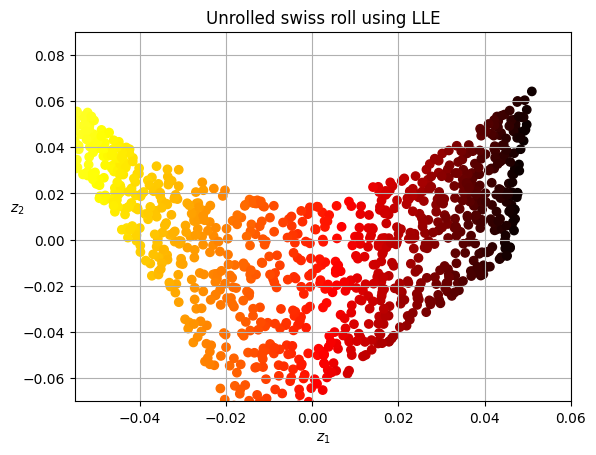

In [80]:
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding
darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

x_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
x_unrolled = lle.fit_transform(x_swiss)

plt.scatter(x_unrolled[:, 0], x_unrolled[:, 1],
            c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.axis([-0.055, 0.060, -0.070, 0.090])
plt.grid(True)

plt.title("Unrolled swiss roll using LLE")
plt.show()


## Other Dimensionality Reduction

C:\Users\rbblazquez\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


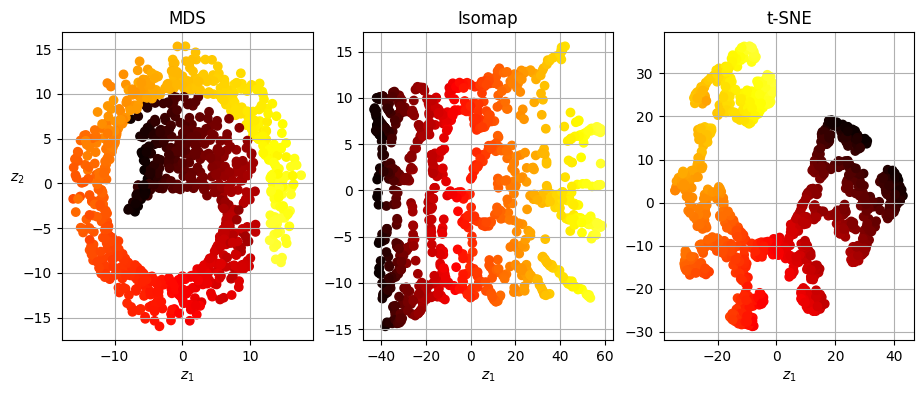

In [83]:
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

x_reduced_mds = MDS(n_components=2, random_state=42).fit_transform(x_swiss)
x_reduced_isomap = Isomap(n_components=2).fit_transform(x_swiss)
x_reduced_tsne = TSNE(n_components=2,init='random', learning_rate='auto', random_state=42).fit_transform(x_swiss)

titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11, 4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (x_reduced_mds, x_reduced_isomap, x_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

plt.show()

